In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
data = pd.read_csv('F:\\NTI PROJECT\\train.csv')


In [187]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [188]:
#fillna
mean_postal_code = data['Postal Code'].mean()
data['Postal Code'] = data['Postal Code'].fillna(mean_postal_code)

In [189]:
data.duplicated().sum()

0

In [190]:
data.describe() #verify outlire or skew

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32023.234209,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


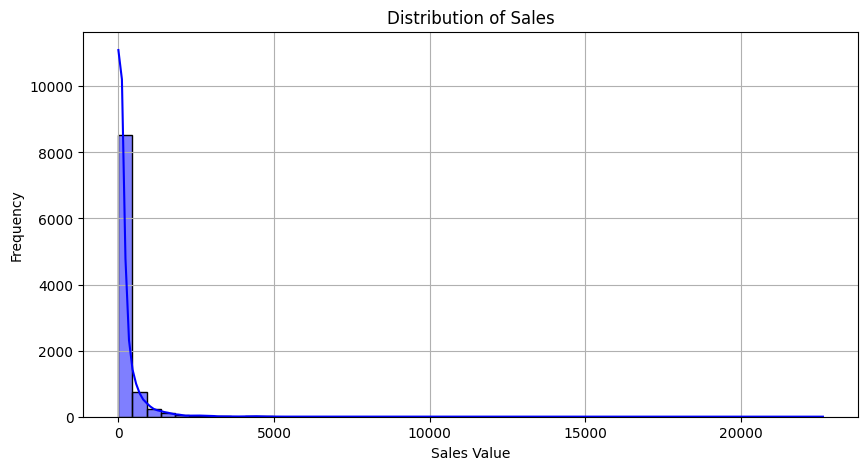

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data['Sales'], bins=50, kde=True, color='blue')
plt.title("Distribution of Sales")
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show() #very skew

In [192]:
data['Sales_Log'] = np.log(data['Sales'])

In [193]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

data['Order_Year'] = data['Order Date'].dt.year
data['Order_Month'] = data['Order Date'].dt.month
data['Order_Day'] = data['Order Date'].dt.day
data['Order_Weekday'] = data['Order Date'].dt.weekday

data['Ship_Year'] = data['Ship Date'].dt.year
data['Ship_Month'] = data['Ship Date'].dt.month
data['Ship_Day'] = data['Ship Date'].dt.day
data['Ship_Weekday'] = data['Ship Date'].dt.weekday

In [194]:
from scipy.stats import skew
sales_log_skew = skew(data['Sales_Log'].dropna())
print("Skewness",sales_log_skew)

Skewness 0.18775834406722938


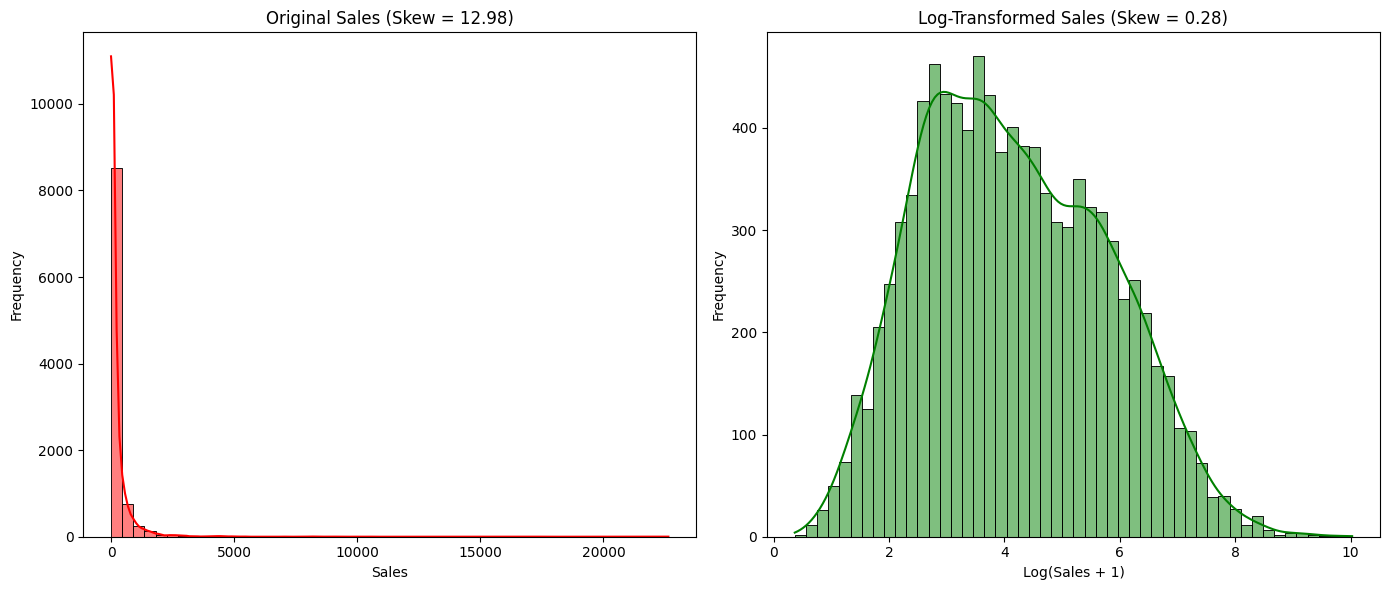

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

original_sales = data['Sales']
log_sales = np.log1p(data['Sales'])

original_skew = skew(original_sales)
log_skew = skew(log_sales)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(original_sales, bins=50, kde=True, color='red')
plt.title(f"Original Sales (Skew = {original_skew:.2f})")
plt.xlabel("Sales")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(log_sales, bins=50, kde=True, color='green')
plt.title(f"Log-Transformed Sales (Skew = {log_skew:.2f})")
plt.xlabel("Log(Sales + 1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


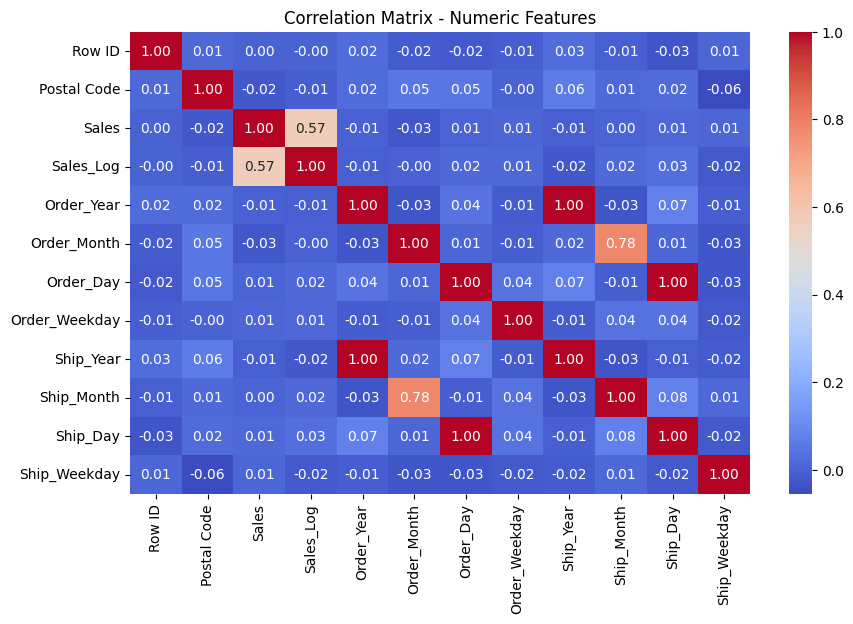

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Numeric Features")
plt.show()

In [197]:
data.drop(['Row ID', 'Sales'], axis=1, inplace=True, errors='ignore')


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     3959 non-null   datetime64[ns]
 2   Ship Date      3815 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [199]:
data['Order ID'].nunique()

4922

In [200]:
data['Customer ID'].nunique()

793

In [201]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Product Name Encoded'] = le.fit_transform(data['Product Name'])
data['Customer ID Encoded'] = le.fit_transform(data['Customer ID'])

#not important

In [202]:



# Drop unnecessary columns




# Drop unused string/date columns


# ✅ Make sure datetime columns are dropped
# assert 'datetime64[ns]' not in str(data.dtypes), "Datetime columns still exist!"

# # Features and target
# X = data.drop(['Sales_Log'], axis=1)
# y = data['Sales_Log']

# Train/test split

# Random Forest with RandomizedSearchCV


# Train



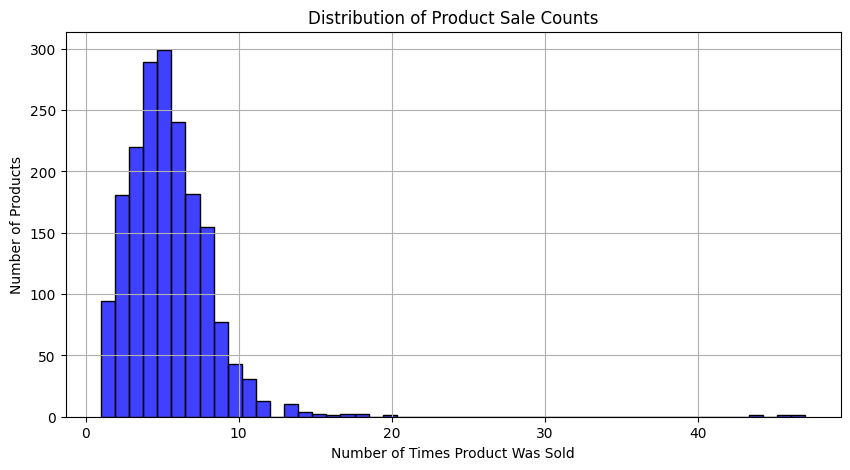

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# نعد عدد مرات بيع كل منتج
product_counts = data['Product Name'].value_counts()

# نرسم histogram
plt.figure(figsize=(10, 5))
sns.histplot(product_counts, bins=50, color='blue')
plt.title("Distribution of Product Sale Counts")
plt.xlabel("Number of Times Product Was Sold")
plt.ylabel("Number of Products")
plt.grid(True)
plt.show()

In [204]:
cat_cols = data.select_dtypes(include='object').columns
# Exclude date columns from label encoding
cat_cols = [col for col in cat_cols if col not in ['Order Date', 'Ship Date']]
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])


In [205]:
data.drop(['Customer Name', 'Customer ID', 'Product Name', 'Product ID', 'Order ID',
           'Order Date', 'Ship Date'], axis=1, inplace=True, errors='ignore')

#### preprocess

In [206]:
assert 'datetime64[ns]' not in str(data.dtypes), "Datetime columns still exist!"


In [207]:
X = data.drop(['Sales_Log'], axis=1)
y = data['Sales_Log']  

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


f:\python3.10\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "f:\python3.10\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\python3.10\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "f:\python3.10\lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "f:\python3.10\lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validat

✅ Best Hyperparameters: {'n_estimators': 250, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 30}
📉 Test RMSE: 1.2051
📊 Test R² Score: 0.4909


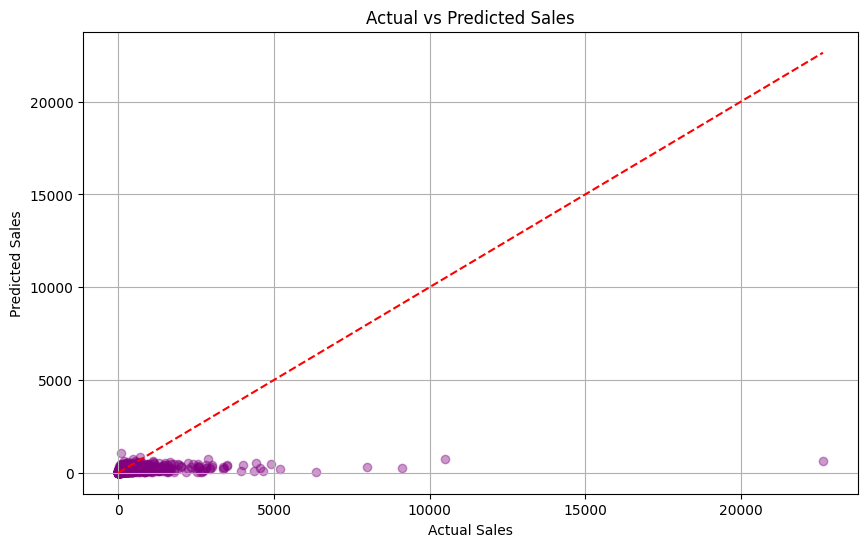

In [209]:
rf_model = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Best Hyperparameters:", random_search.best_params_)
print(f"📉 Test RMSE: {rmse:.4f}")
print(f"📊 Test R² Score: {r2:.4f}")

# Optional: plot predictions vs actual
plt.figure(figsize=(10,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred), alpha=0.4, color='purple')
plt.plot([0, max(np.expm1(y_test))], [0, max(np.expm1(y_test))], 'r--')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()

In [210]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=250, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"📉 XGBoost RMSE: {rmse_xgb:.4f}")
print(f"📊 XGBoost R² Score: {r2_xgb:.4f}")


📉 XGBoost RMSE: 1.0860
📊 XGBoost R² Score: 0.5866


In [211]:
from sklearn.ensemble import VotingRegressor

ensemble_model = VotingRegressor(estimators=[
    ('rf', best_model),
    ('xgb', xgb)
])
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"📉 Ensemble RMSE: {rmse_ensemble:.4f}")
print(f"📊 Ensemble R² Score: {r2_ensemble:.4f}")


📉 Ensemble RMSE: 1.1188
📊 Ensemble R² Score: 0.5613


In [212]:
import pandas as pd
import numpy as np
from datetime import datetime

# Example date input
input_date = '2017-07-07'
date = pd.to_datetime(input_date)

# Build input row matching X_train.columns
input_features = {}

for col in X_train.columns:
    if 'Order_Year' in col:
        input_features[col] = date.year
    elif 'Order_Month' in col:
        input_features[col] = date.month
    elif 'Order_Day' in col:
        input_features[col] = date.day
    elif 'Order_Weekday' in col:
        input_features[col] = date.weekday()
    elif 'Ship_Year' in col:
        input_features[col] = date.year
    elif 'Ship_Month' in col:
        input_features[col] = date.month
    elif 'Ship_Day' in col:
        input_features[col] = min(date.day + 2, 28)
    elif 'Ship_Weekday' in col:
        input_features[col] = (date.weekday() + 2) % 7
    elif 'Sales' in col:
        continue  # don't add target column
    else:
        # Use median or mode-like defaults
        input_features[col] = X_train[col].mode()[0] if X_train[col].dtype == 'int64' else X_train[col].median()

# Convert to DataFrame
input_df = pd.DataFrame([input_features])

# Predict
predicted_log = ensemble_model.predict(input_df)[0]
predicted_sales = np.expm1(predicted_log)

print(f"📆 Input Date: {input_date}")
print(f"💰 Predicted Sales: {predicted_sales:.2f}")


📆 Input Date: 2017-07-07
💰 Predicted Sales: 39.96


In [214]:
import joblib

# Save Random Forest
joblib.dump(ensemble_model, 'rf_model.pkl')

# Save XGBoost
joblib.dump(xgb, 'xgb_model.pkl')

# Save feature columns (shared between models)
joblib.dump(X_train.columns, 'model_columns.pkl')


['model_columns.pkl']

In [215]:
# Save this inside your script temporarily
sample_data = {
    'date': pd.date_range(start='2017-06-01', periods=30),
    'log_sales': np.random.uniform(2.5, 3.2, 30)
}
pd.DataFrame(sample_data).to_csv("historical_sales.csv", index=False)